In [1]:
import sys

sys.path.append("../python/")

import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources'

# Goal

* Run on PPM's exp. 2 stimuli (= chords). See R script for details.

Info: 

    Sequence consists of three sections, each separated by "0, 0, 0". Each section contains 2 samples from hrep's corpora.
    
    First sec.    Second sec.       Third sec.
    1-53 54-100   101-161 162-173   174-219 220-294.
    
    [ 14481, 8473, 12553, 14481, 4245, 8465, 146, 18707, 14481, 4241, 14481, 12553, 14485, 18693, 22793, 149, 4243, 14481, 14482, 18709, 22793, 18757, 14481, 4241, 8465, 4293, 133, 22803, 22793, 4243, 14481, 22793, 14483, 145, 14481, 12585, 14481, 18693, 22793, 14481, 4243, 4677, 23625, 14481, 4241, 14481, 4113, 12553, 8457, 4677, 149, 4243, 14481, 17481, 12561, 2313, 4241, 6409, 8465, 22675, 8337, 18577, 22677, 2313, 23109, 22597, 22675, 8337, 2323, 12617, 18629, 8337, 18579, 4245, 2313, 8337, 2309, 22803, 2085, 4677, 12433, 22801, 2321, 12561, 4645, 2321, 22805, 18577, 3145, 8337, 22801, 12563, 19013, 8337, 18629, 17481, 12617, 4242, 8339, 18577, 0, 0, 0, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 20626, 2195, 12434, 18579, 4371, 14483, 14611, 147, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 20626, 16531, 2194, 8339, 18578, 147, 10386, 275, 10387, 8467, 18579, 4242, 10387, 20626, 6419, 16531, 2194, 14611, 147, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 20626, 16531, 2194, 8339, 18578, 147, 10386, 8467, 14611, 20626, 22819, 8595, 18707, 12579, 10515, 275, 22931, 275, 16530, 0, 0, 0, 18705, 145, 18705, 145, 18705, 145, 18705, 145, 18705, 145, 10385, 4241, 14481, 145, 18577, 145, 18577, 145, 10385, 4241, 14481, 145, 18705, 145, 18705, 145, 10385, 4241, 14481, 145, 18577, 145, 18577, 145, 10385, 4241, 14481, 145, 18705, 145, 18705, 145, 18705, 16529, 16453, 16529, 14627, 147, 10513, 14661, 147, 10513, 14661, 16517, 14661, 10513, 20755, 6291, 16529, 14627, 147, 10513, 14661, 16517, 14661, 10513, 20755, 275, 6867, 6289, 16529, 16531, 2193, 16529, 6291, 16529, 16530, 2193, 12433, 2193, 2194, 275, 20755, 16529, 12945, 2193, 16529, 2193, 12435, 10515, 20755, 6867, 6289, 16529, 16531, 2193, 16529, 6291, 16529, 16530, 2193, 12433, 2193, 2194, 275, 20755, 16529, 16453, 16529, 16453, 16529, 16453, 16529, 16453, 16529, 16453, 16529, 16453 ]


In [2]:
from drex import DREXDistribution

input_sequence = [ 14481, 8473, 12553, 14481, 4245, 8465, 146, 18707, 14481, 4241, 14481, 12553, 14485, 18693, 22793, 149, 4243, 14481, 14482, 18709, 22793, 18757, 14481, 4241, 8465, 4293, 133, 22803, 22793, 4243, 14481, 22793, 14483, 145, 14481, 12585, 14481, 18693, 22793, 14481, 4243, 4677, 23625, 14481, 4241, 14481, 4113, 12553, 8457, 4677, 149, 4243, 14481, 17481, 12561, 2313, 4241, 6409, 8465, 22675, 8337, 18577, 22677, 2313, 23109, 22597, 22675, 8337, 2323, 12617, 18629, 8337, 18579, 4245, 2313, 8337, 2309, 22803, 2085, 4677, 12433, 22801, 2321, 12561, 4645, 2321, 22805, 18577, 3145, 8337, 22801, 12563, 19013, 8337, 18629, 17481, 12617, 4242, 8339, 18577, 0, 0, 0, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 20626, 2195, 12434, 18579, 4371, 14483, 14611, 147, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 20626, 16531, 2194, 8339, 18578, 147, 10386, 275, 10387, 8467, 18579, 4242, 10387, 20626, 6419, 16531, 2194, 14611, 147, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 20626, 16531, 2194, 8339, 18578, 147, 10386, 8467, 14611, 20626, 22819, 8595, 18707, 12579, 10515, 275, 22931, 275, 16530, 0, 0, 0, 18705, 145, 18705, 145, 18705, 145, 18705, 145, 18705, 145, 10385, 4241, 14481, 145, 18577, 145, 18577, 145, 10385, 4241, 14481, 145, 18705, 145, 18705, 145, 10385, 4241, 14481, 145, 18577, 145, 18577, 145, 10385, 4241, 14481, 145, 18705, 145, 18705, 145, 18705, 16529, 16453, 16529, 14627, 147, 10513, 14661, 147, 10513, 14661, 16517, 14661, 10513, 20755, 6291, 16529, 14627, 147, 10513, 14661, 16517, 14661, 10513, 20755, 275, 6867, 6289, 16529, 16531, 2193, 16529, 6291, 16529, 16530, 2193, 12433, 2193, 2194, 275, 20755, 16529, 12945, 2193, 16529, 2193, 12435, 10515, 20755, 6867, 6289, 16529, 16531, 2193, 16529, 6291, 16529, 16530, 2193, 12433, 2193, 2194, 275, 20755, 16529, 16453, 16529, 16453, 16529, 16453, 16529, 16453, 16529, 16453, 16529, 16453 ]
prior_input_sequence = [0,1,2,3,4, 1,1,1,1,1]
prior_distribution = DREXDistribution.GAUSSIAN
prior_DOrMaxNComp = 5

alphabet_size = len(set(input_sequence))

print("Input sequence:", input_sequence)
print("Length of input sequence:", len(input_sequence))
print()
print("DREX: Prior input sequence:", prior_input_sequence)
print("DREX: Length of prior input sequence:", len(prior_input_sequence))
print("DREX: Prior distribution:", prior_distribution)
print("DREX: Prior D or MaxNComp:", prior_DOrMaxNComp)
print()
print("PPM: Alphabet size:", alphabet_size)

Input sequence: [14481, 8473, 12553, 14481, 4245, 8465, 146, 18707, 14481, 4241, 14481, 12553, 14485, 18693, 22793, 149, 4243, 14481, 14482, 18709, 22793, 18757, 14481, 4241, 8465, 4293, 133, 22803, 22793, 4243, 14481, 22793, 14483, 145, 14481, 12585, 14481, 18693, 22793, 14481, 4243, 4677, 23625, 14481, 4241, 14481, 4113, 12553, 8457, 4677, 149, 4243, 14481, 17481, 12561, 2313, 4241, 6409, 8465, 22675, 8337, 18577, 22677, 2313, 23109, 22597, 22675, 8337, 2323, 12617, 18629, 8337, 18579, 4245, 2313, 8337, 2309, 22803, 2085, 4677, 12433, 22801, 2321, 12561, 4645, 2321, 22805, 18577, 3145, 8337, 22801, 12563, 19013, 8337, 18629, 17481, 12617, 4242, 8339, 18577, 0, 0, 0, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 20626, 2195, 12434, 18579, 4371, 14483, 14611, 147, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 20626, 16531, 2194, 8339, 18578, 147, 10386, 275, 10387, 8467, 18579, 4242, 10387, 20626, 6419, 16531, 2194, 14611, 147, 10386, 16531, 2194, 8339, 18578, 147, 275, 10387, 

/Users/alexander/opt/anaconda3/envs/cmme/lib/python3.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


In [3]:
from model_io import *

alias = "example05"
ppm_model_io_paths = ModelIO("./io/", alias).generate_ppm_paths()
drex_model_io_paths =  ModelIO("./io/", alias).generate_drex_paths()
plot_model_io_paths = ModelIO("./io/", alias).generate_plot_paths()

print("ppm: ", ppm_model_io_paths["generic_filename_prefix"])
print("drex:", drex_model_io_paths["generic_filename_prefix"])
print("plot:", plot_model_io_paths["generic_filename_prefix"])

ppm:  /Users/alexander/git/cmme-comparison/jupyter/io/ppm/20220418T165311_example05_
drex: /Users/alexander/git/cmme-comparison/jupyter/io/drex/20220418T165311_example05_
plot: /Users/alexander/git/cmme-comparison/jupyter/io/plot/20220418T165311_example05_


# PPM

In [4]:
from ppm import *

ppmib = PPMInstanceBuilder(ppm_model_io_paths)
ppm = ppmib.alphabet_size(alphabet_size).build()

result = ppm.observe(input_sequence)

ppm_output_file = result
print("PPM output file:", ppm_output_file)

PPM output file: /Users/alexander/git/cmme-comparison/jupyter/io/ppm/20220418T165311_example05_output.csv


# D-REX

In [5]:
from drex import *

drexib = DREXInstanceBuilder(drex_model_io_paths)

drexpe = DREXPriorEstimator(drex_model_io_paths)
prior_estimator_result = drexpe.estimate(prior_distribution, prior_DOrMaxNComp, prior_input_sequence)
prior_estimator_output_file = prior_estimator_result['result']['output_file_path']
prior = DREXPriorOutputParameters.from_mat(prior_estimator_output_file)

drex = drexib.D(prior_DOrMaxNComp).prior(prior).build()

result = drex.observe(input_sequence)

drex_output_file = result['result']['output_file_path']
print("DREX output file:", drex_output_file)

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-af7cd4a3-a158-49f2-a54e-399e6b281360
Send 'exit' command to kill the server
.....MATLAB started and connected!
DREX output file: /Users/alexander/git/cmme-comparison/jupyter/io/drex/20220418T165311_example05_output.mat


# Plot

In [6]:
from model_output_plot import *

mop = ModelOutputPlot(plot_model_io_paths, ppm_output_file, drex_output_file)
mop_figures = mop.plot()

print("Figures:", mop_figures)

2022-04-18 16:53:35.217 MATLAB[49395:6478020] CoreText note: Client requested name ".SFNS-Regular", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-04-18 16:53:35.217 MATLAB[49395:6478020] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2022-04-18 16:53:35.222 MATLAB[49395:6478020] CoreText note: Client requested name ".SFNS-Bold", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-04-18 16:53:35.230 MATLAB[49395:6478020] CoreText note: Client requested name ".SFNS-Regular", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2022-04-18 16:53:35.230 MATLAB[4

Figures: ['/Users/alexander/git/cmme-comparison/jupyter/io/plot/20220418T165311_example05_MatlabFig001.png']


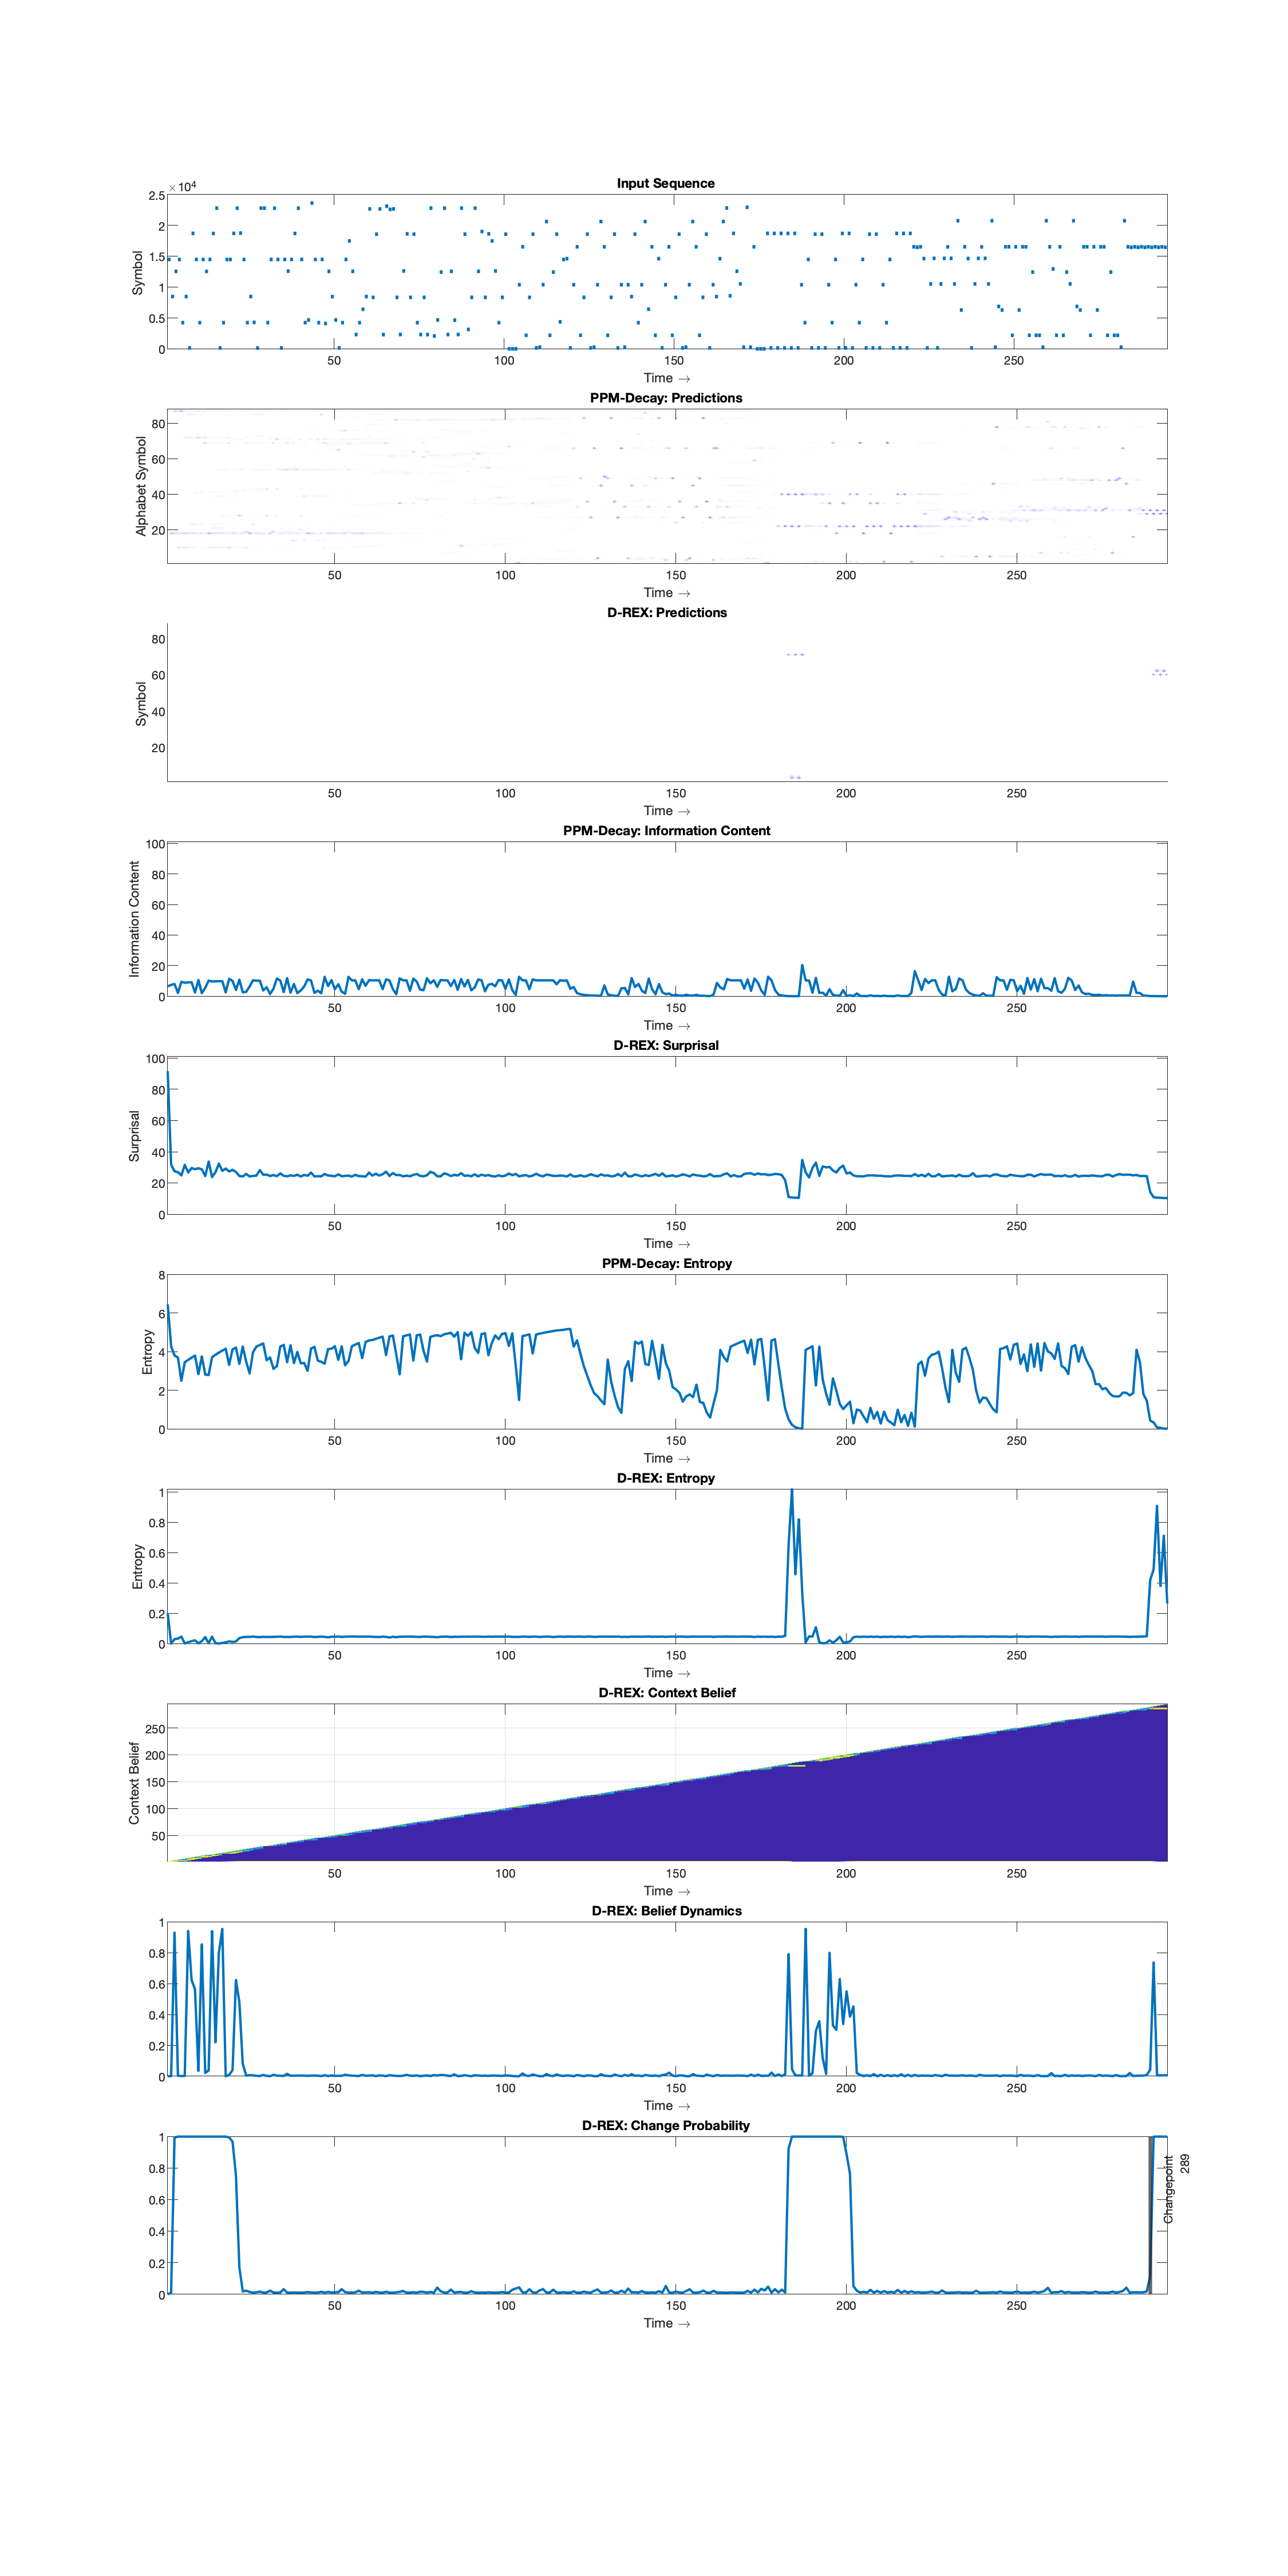

MATLAB closed


In [7]:
from IPython.display import Image
for f in mop_figures:
    display(Image(filename=f))

# Interpretation

Stimuli changes at obs. 161, 262, 359, 458, 476.

Predictions:
1. Hard to interpret.

---

Information Content / Surprisal:
1. There are significant drops between corpora. But this could be due to many different coding techniques within each corpus.
2. However, PPM has some significant entropy changes. What do they mean?

---

Entropy:
1. -

---

Context Beliefs (D-REX):
1. D-REX seems to detect the different corpora. 
2. However, the small peaks seem interesting.

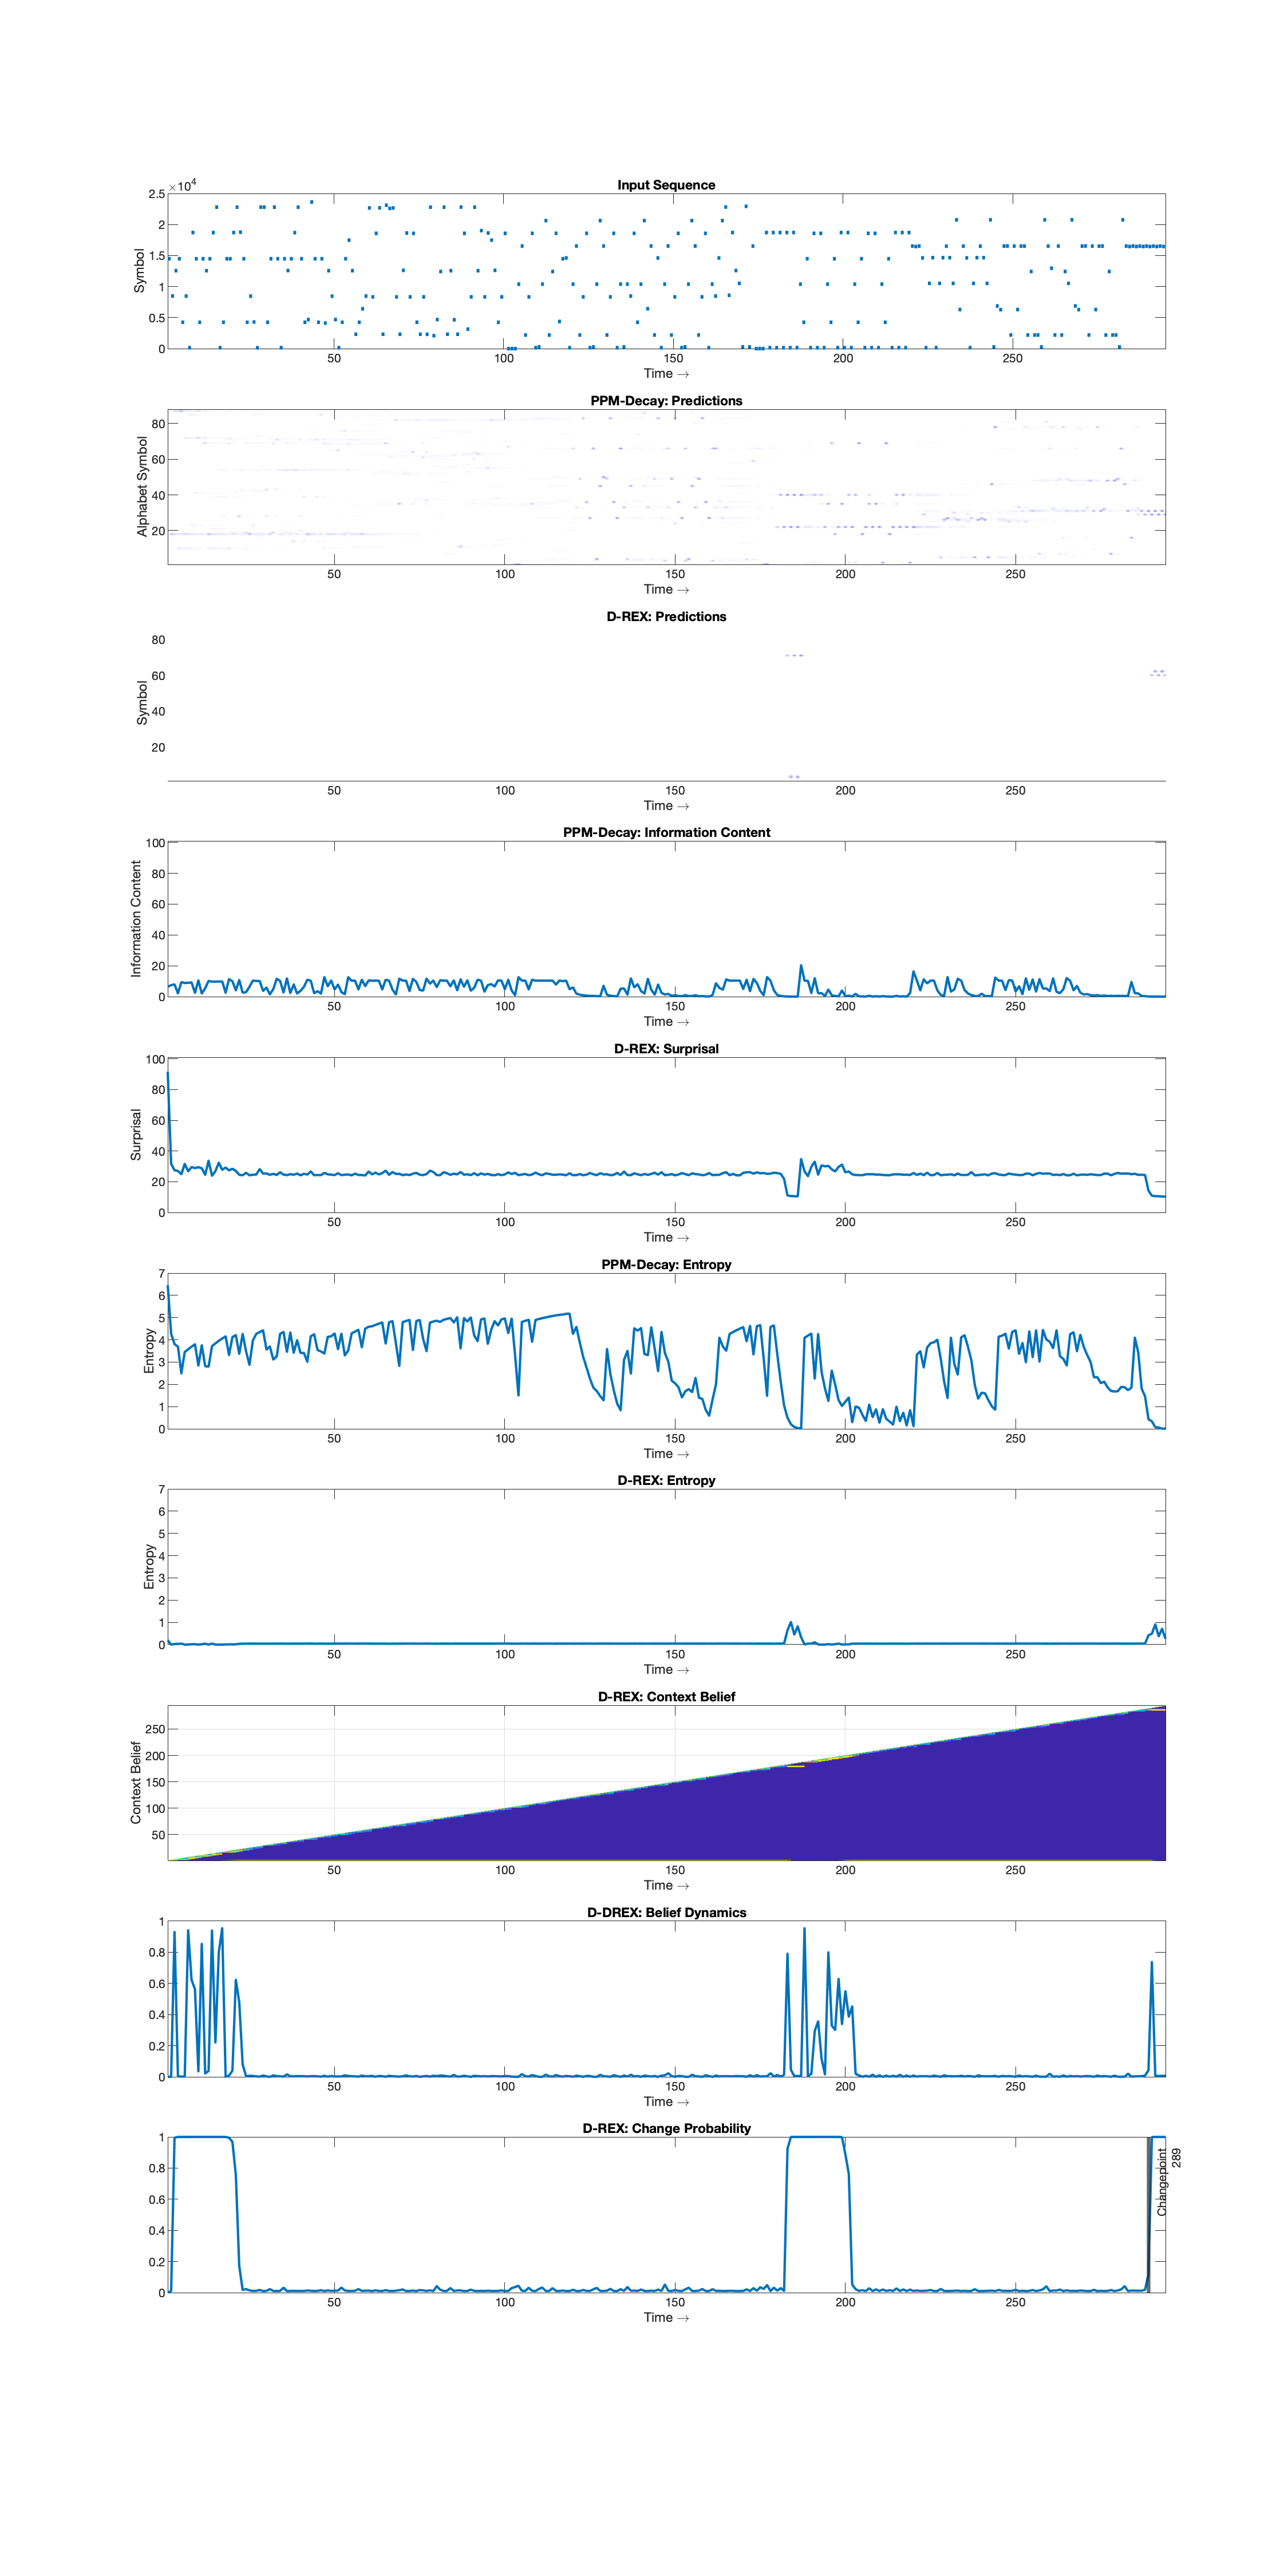